In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [1]:
!pip install yfinance --quiet
import yfinance as yf
print("yfinance imported — starting download...")

ticker = "INFY.NS"
data = yf.download(ticker, start="2020-01-01", end="2024-12-31")

data.to_csv("stock_data.csv")
print(f"✅ Downloaded {len(data)} rows for {ticker} and saved as stock_data.csv")
data.head()



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


yfinance imported — starting download...


C:\Users\pavit\AppData\Local\Temp\ipykernel_22432\4164309302.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed

✅ Downloaded 1237 rows for INFY.NS and saved as stock_data.csv


Price,Close,High,Low,Open,Volume
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS
Date,,,,,
2020-01-01,633.151123,635.857836,629.456284,631.561499,2112415
2020-01-02,631.303711,636.545221,628.038506,634.912644,5658200
2020-01-03,641.013367,642.731901,630.616254,630.616254,7882938
2020-01-06,634.869629,647.715686,632.850372,641.099317,6519403
2020-01-07,625.460815,638.092005,623.054825,634.139396,7899363


In [4]:
import pandas as pd
from pathlib import Path

# ✅ Load the downloaded CSV from local directory
csv_path = Path("stock_data.csv")

if not csv_path.exists():
    raise FileNotFoundError(f"❌ File not found at {csv_path.resolve()}")

df = pd.read_csv(csv_path)
print("✅ File loaded successfully!")
display(df.head())


✅ File loaded successfully!


,Price,Close,High,Low,Open,Volume
0,Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,633.151123046875,635.857836165516,629.456283947449,631.5614994346679,2112415
3,2020-01-02,631.3037109375,636.5452206149837,628.0385056083046,634.9126441731436,5658200
4,2020-01-03,641.0133666992188,642.7319011943908,630.6162539816314,630.6162539816314,7882938


In [8]:
import pandas as pd

# Read the CSV and skip the first two unwanted rows
df = pd.read_csv('stock_data.csv', skiprows=2)

# Rename the columns correctly (based on your earlier file content)
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop missing or invalid dates
df = df.dropna(subset=['Date'])

# Set Date as index
df.set_index('Date', inplace=True)

print("✅ Data cleaned successfully!")
print(df.head())




✅ Data cleaned successfully!
                 Close        High         Low        Open   Volume
Date                                                               
2020-01-01  633.151123  635.857836  629.456284  631.561499  2112415
2020-01-02  631.303711  636.545221  628.038506  634.912644  5658200
2020-01-03  641.013367  642.731901  630.616254  630.616254  7882938
2020-01-06  634.869629  647.715686  632.850372  641.099317  6519403
2020-01-07  625.460815  638.092005  623.054825  634.139396  7899363


In [9]:
print(df.columns)


Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


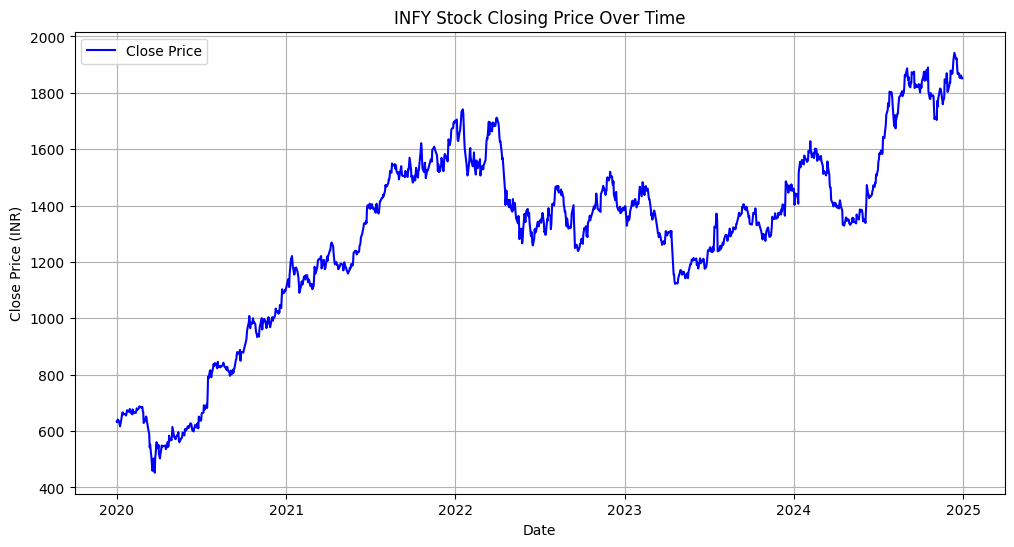

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], color='blue', label='Close Price')

plt.title("INFY Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (INR)")
plt.legend()
plt.grid(True)
plt.show()




In [11]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd

# Load your dataset
df = pd.read_csv("Stock_Data.csv")

# Optional: show first few rows
print(df.head())


        Price              Close               High                Low  \
0      Ticker            INFY.NS            INFY.NS            INFY.NS   
1        Date                NaN                NaN                NaN   
2  2020-01-01   633.151123046875   635.857836165516   629.456283947449   
3  2020-01-02     631.3037109375  636.5452206149837  628.0385056083046   
4  2020-01-03  641.0133666992188  642.7319011943908  630.6162539816314   

                Open   Volume  
0            INFY.NS  INFY.NS  
1                NaN      NaN  
2  631.5614994346679  2112415  
3  634.9126441731436  5658200  
4  630.6162539816314  7882938  


In [15]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Ensure Close column is numeric
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# Drop rows with NaN (from invalid conversions)
df = df.dropna(subset=['Close'])

# Use past 5 days to predict the 6th day (sliding window)
def create_features(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Predict 'Close' price
stock_data = df['Close'].values.reshape(-1, 1)

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(stock_data)

# Create features and labels
window_size = 5
X, y = create_features(scaled_data, window_size)

print("✅ Data scaled successfully!")
print("X shape:", X.shape)
print("y shape:", y.shape)


✅ Data scaled successfully!
X shape: (1232, 5, 1)
y shape: (1232, 1)


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)  # No shuffle for time series

In [34]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# Reshape X_train and X_test to be 2D arrays for LinearRegression
# New shape will be (samples, window_size * number_of_features)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

lr.fit(X_train_reshaped, y_train)
y_pred_lr = lr.predict(X_test_reshaped)

In [38]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Reshape X_train and X_test to be 2D arrays for RandomForestRegressor
# New shape will be (samples, window_size * number_of_features)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

rf.fit(X_train_reshaped, y_train.ravel())
y_pred_rf = rf.predict(X_test_reshaped)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Import numpy as it is used for np.sqrt

# Evaluate Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("\nLinear Regression Model:")
print(f"  MSE: {mse_lr:.4f}")
print(f"  RMSE: {np.sqrt(mse_lr):.4f}")
print(f"  R² Score: {r2_lr:.4f}")

# Evaluate Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("\nRandom Forest Model:")
print(f"  MSE: {mse_rf:.4f}")
print(f"  RMSE: {np.sqrt(mse_rf):.4f}")
print(f"  R² Score: {r2_rf:.4f}")


Linear Regression Model:
  MSE: 0.0003
  RMSE: 0.0169
  R² Score: 0.9823

Random Forest Model:
  MSE: 0.0052
  RMSE: 0.0720
  R² Score: 0.6801


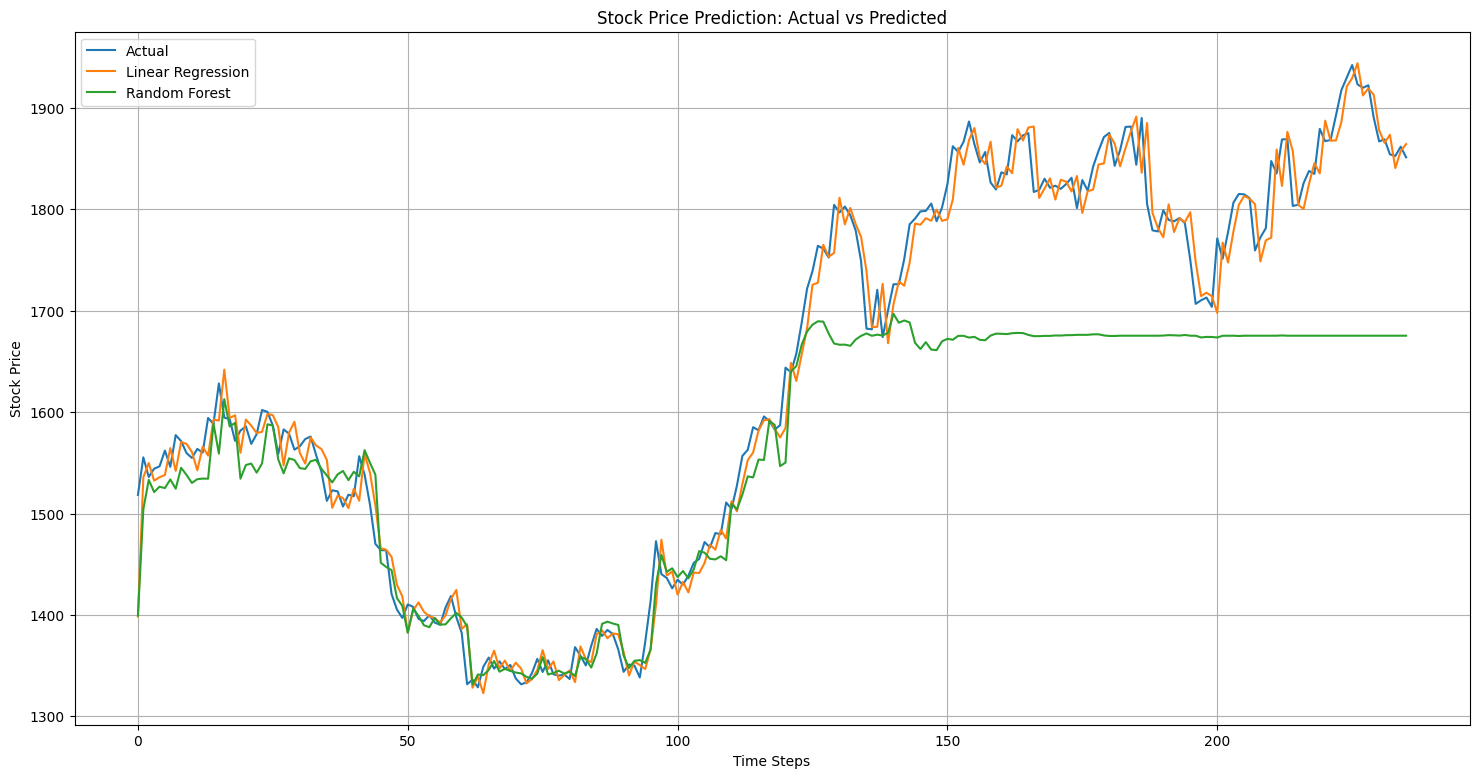

In [45]:
plt.figure(figsize=(18, 9))  # make it big and clear
plt.plot(range(len(y_test)), scaler.inverse_transform(y_test.reshape(-1, 1)), label="Actual")
plt.plot(range(len(y_test)), scaler.inverse_transform(y_pred_lr.reshape(-1, 1)), label="Linear Regression")
plt.plot(range(len(y_test)), scaler.inverse_transform(y_pred_rf.reshape(-1, 1)), label="Random Forest")
plt.title("Stock Price Prediction: Actual vs Predicted")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()



In [54]:
# Install these if not already installed
# pip install tensorflow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
def create_lstm_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i, 0])  # sequence of window_size
        y.append(data[i, 0])  # target value
    return np.array(X), np.array(y)

window_size = 60
X, y = create_lstm_sequences(scaled_data, window_size)

# Reshape to (samples, time_steps, features) for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [62]:
def create_lstm_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i, 0])  # sequence of window_size
        y.append(data[i, 0])  # target value
    return np.array(X), np.array(y)

window_size = 60
X, y = create_lstm_sequences(scaled_data, window_size)

# Reshape to (samples, time_steps, features) for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [68]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [69]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20


C:\Users\pavit\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0406 - val_loss: 0.0024
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0027 - val_loss: 0.0044
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0013 - val_loss: 0.0027
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0010 - val_loss: 0.0023
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 9.9091e-04 - val_loss: 0.0017
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 9.9710e-04 - val_loss: 0.0024
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 9.9700e-04 - val_loss: 0.0027
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 9.9427e-04 - val_loss: 0.0015
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 9.4275e-04 - val_loss: 0.0019
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 9.0164e-04 - val_loss: 0.0013
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/ste

In [73]:
y_pred = model.predict(X_test)

# Reverse scaling
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# Metrics
mse_lstm = mean_squared_error(y_test_inv, y_pred_inv)
r2_lstm = r2_score(y_test_inv, y_pred_inv)

print(f"LSTM Model Evaluation:\nMSE: {mse_lstm:.4f}\nRMSE: {np.sqrt(mse_lstm):.4f}\nR²: {r2_lstm:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
LSTM Model Evaluation:
MSE: 2892.0080
RMSE: 53.7774
R²: 0.9195


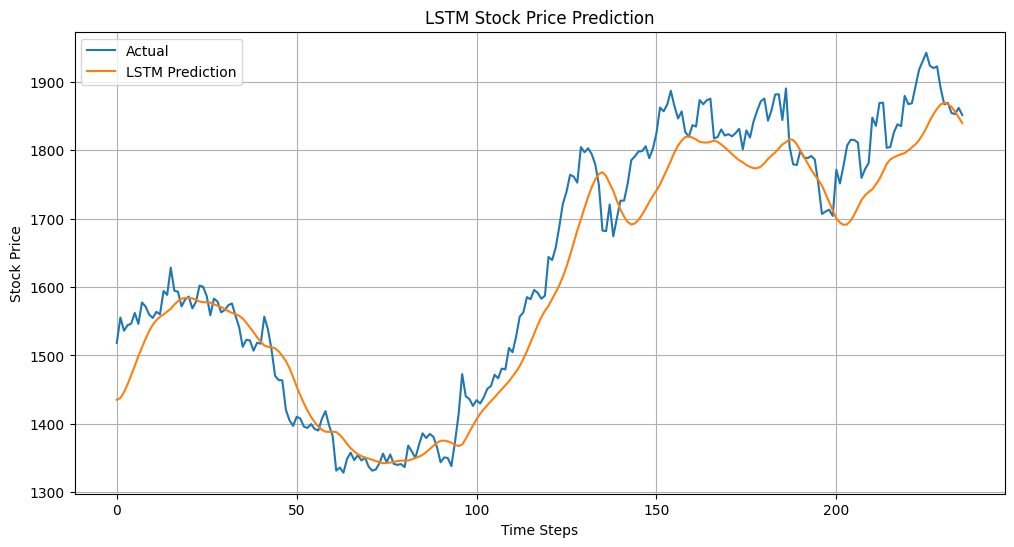

In [76]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label="Actual")
plt.plot(y_pred_inv, label="LSTM Prediction")
plt.title("LSTM Stock Price Prediction")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()


# XGBoost Regression

In [80]:
# Install xgboost if not already installed
!pip install xgboost

# Import libraries
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Flatten 3D LSTM-style input to 2D
X_train_flat = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test_flat = X_test.reshape(X_test.shape[0], X_test.shape[1])

# Train XGBoost model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train_flat, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test_flat)

# Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print("XGBoost MSE:", mse_xgb)
print("XGBoost RMSE:", rmse_xgb)
print("XGBoost R² Score:", r2_xgb)


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   - -------------------------------------- 3.1/72.0 MB 16.7 MB/s eta 0:00:05
   --- ------------------------------------ 7.1/72.0 MB 18.1 MB/s eta 0:00:04
   ----- ---------------------------------- 9.2/72.0 MB 15.4 MB/s eta 0:00:05
   ------ --------------------------------- 11.0/72.0 MB 13.1 MB/s eta 0:00:05
   ------- -------------------------------- 12.8/72.0 MB 12.2 MB/s eta 0:00:05
   -------- ------------------------------- 14.7/72.0 MB 11.7 MB/s eta 0:00:05
   --------- ------------------------------ 17.8/72.0 MB 12.0 MB/s eta 0:00:05
   ------------ --------------------------- 22.0/72.0 MB 13.0 MB/s eta 0:00:04
   -------------- ------------------------- 25.4/72.0 MB 13.6 MB/s eta 0:00:04
   --------------- ------------------------ 27.8/72.0 MB 13.2 MB/s eta 0:00:04
   ---------------- ----------------------- 30.1/72.0 MB 13.0 MB/


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


XGBoost MSE: 0.008337257597409135
XGBoost RMSE: 0.09130858446722923
XGBoost R² Score: 0.4849420293646005


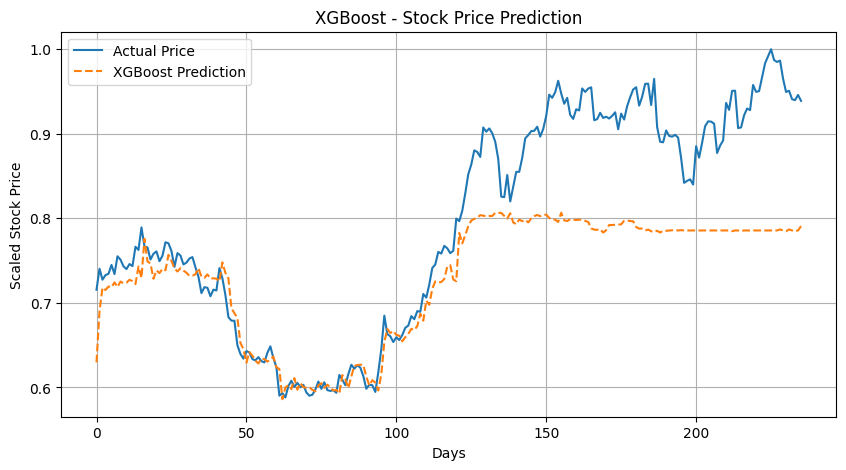

In [83]:
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Price')
plt.plot(y_pred_xgb, label='XGBoost Prediction', linestyle='--')
plt.title("XGBoost - Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Scaled Stock Price")
plt.legend()
plt.grid(True)
plt.show()


Light GBM Regression

In [85]:
# Install LightGBM if not installed
!pip install lightgbm

from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train LightGBM model
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgbm.fit(X_train_flat, y_train)

# Predict
y_pred_lgbm = lgbm.predict(X_test_flat)

# Evaluation
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print("LightGBM MSE:", mse_lgbm)
print("LightGBM R² Score:", r2_lgbm)


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 10.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 941, number of used features: 60
[LightGBM] [Info] Start training from score 0.539763
LightGBM MSE: 0.006363786485083256
LightGBM R² Score: 0.6068588604504028


C:\Users\pavit\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


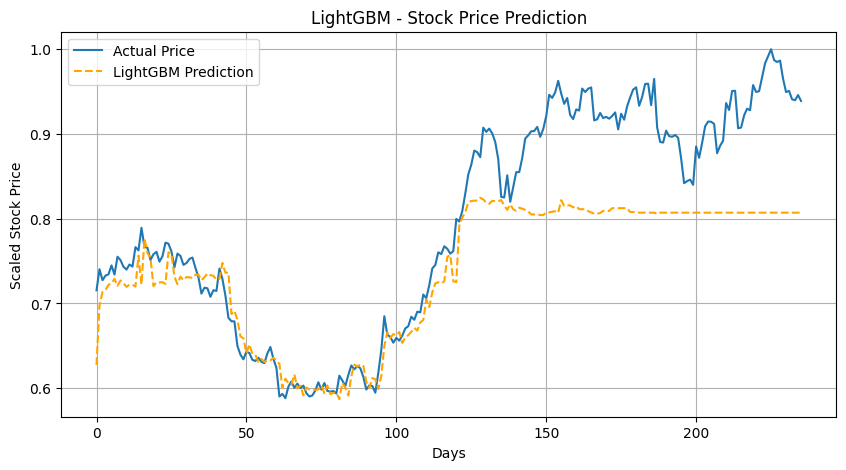

In [88]:
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Price')
plt.plot(y_pred_lgbm, label='LightGBM Prediction', linestyle='--', color='orange')
plt.title("LightGBM - Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Scaled Stock Price")
plt.legend()
plt.grid(True)
plt.show()


Prophet (Time Serise Forcasting)

16:23:07 - cmdstanpy - INFO - Chain [1] start processing
16:23:07 - cmdstanpy - INFO - Chain [1] done processing


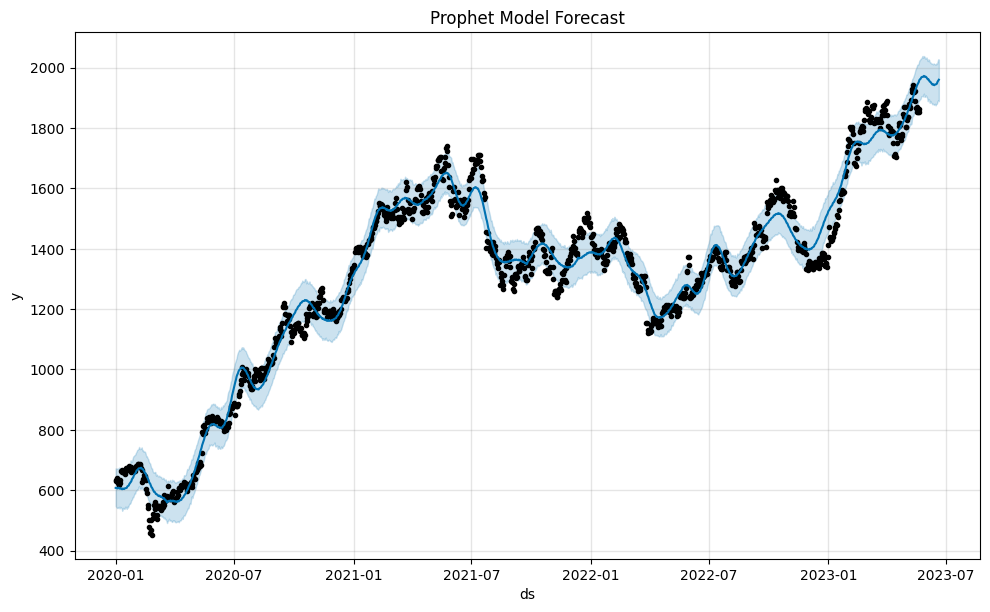

In [183]:
from sklearn.preprocessing import MinMaxScaler
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

# Create a date column (assuming your data is in order, 1 record per day)
df = df.reset_index(drop=True)
df['Date'] = pd.date_range(start='2020-01-01', periods=len(df), freq='D')

# Prepare Prophet dataframe
df_prophet = df[['Date', 'Close']].copy()
df_prophet.columns = ['ds', 'y']

# ✅ Fit the scaler on Close column (only once)
scaler = MinMaxScaler()
scaler.fit(df[['Close']])

# Fit Prophet model
model = Prophet()
model.fit(df_prophet)

# Forecast next 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot results
model.plot(forecast)
plt.title("Prophet Model Forecast")
plt.show()


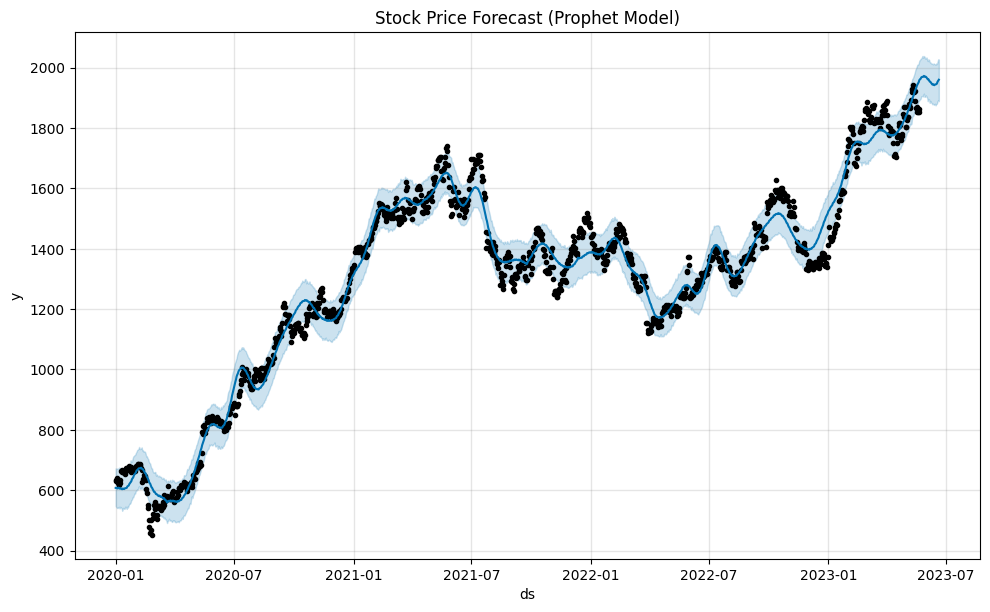

C:\Users\pavit\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


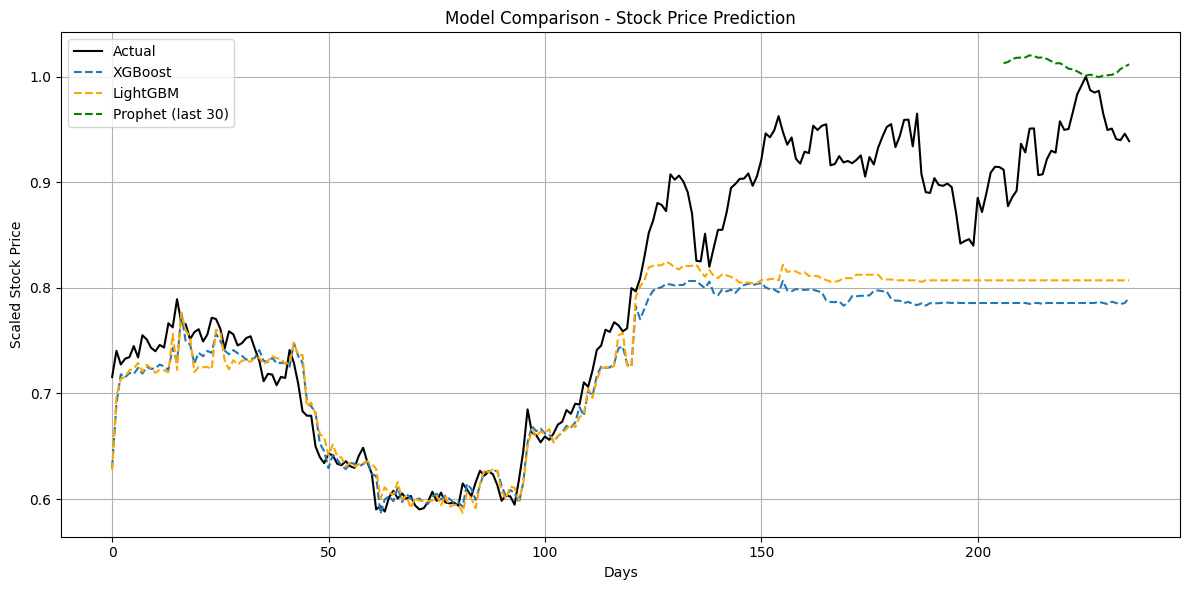

In [192]:
# ... all imports and Prophet code above ...

# Plot forecast (optional)
model.plot(forecast)
plt.title("Stock Price Forecast (Prophet Model)")
plt.show()

# 🔽 Now add this block right below it 🔽

from sklearn.preprocessing import MinMaxScaler

# Prophet predictions (last 30 days) - scaled to match others
scaler = MinMaxScaler()                # ✅ create scaler
scaler.fit(df[['Close']])              # ✅ fit it once using actual Close values

y_pred_prophet_raw = forecast['yhat'][-30:].values.reshape(-1, 1)
y_pred_prophet = scaler.transform(y_pred_prophet_raw).flatten()  # ✅ flatten to 1D for plotting

# Combined comparison plot
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='black')
plt.plot(y_pred_xgb, label='XGBoost', linestyle='--')
plt.plot(y_pred_lgbm, label='LightGBM', linestyle='--', color='orange')
plt.plot(range(len(y_test)-30, len(y_test)), y_pred_prophet, label='Prophet (last 30)', linestyle='--', color='green')

plt.title("Model Comparison - Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Scaled Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




C:\Users\pavit\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


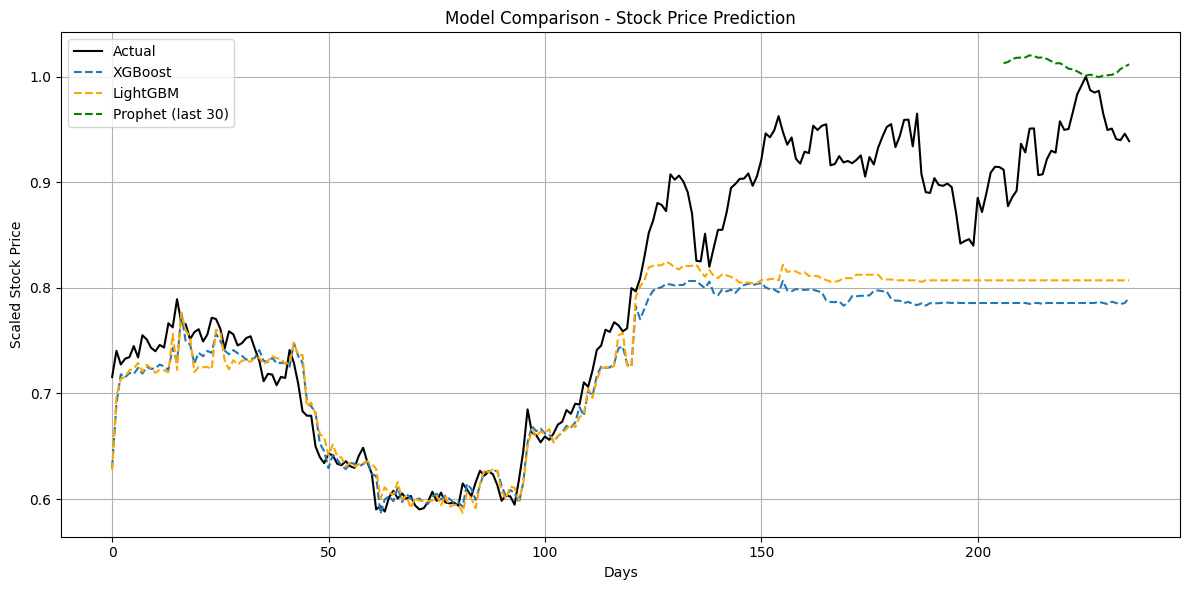

In [199]:
# Prophet predictions (last 30 days) - scaled to match others
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()                 # ✅ create a new scaler
scaler.fit(df[['Close']])               # ✅ fit it once using actual Close values

y_pred_prophet_raw = forecast['yhat'][-30:].values.reshape(-1, 1)
y_pred_prophet = scaler.transform(y_pred_prophet_raw).flatten()  # ✅ flatten to 1D

# Combined comparison plot
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='black')
plt.plot(y_pred_xgb, label='XGBoost', linestyle='--')
plt.plot(y_pred_lgbm, label='LightGBM', linestyle='--', color='orange')
plt.plot(range(len(y_test)-30, len(y_test)), y_pred_prophet, label='Prophet (last 30)', linestyle='--', color='green')

plt.title("Model Comparison - Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Scaled Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# Result


In [205]:
from sklearn.metrics import mean_squared_error, r2_score

# Prophet performance — comparing last 30 predictions with actual last 30 test values
y_true_prophet = y_test[-30:]
mse_prophet = mean_squared_error(y_true_prophet, y_pred_prophet)
r2_prophet = r2_score(y_true_prophet, y_pred_prophet)


results = {
    'Model': ['Linear Regression', 'Random Forest', 'LSTM', 'XGBoost', 'LightGBM', 'Prophet'],
    'MSE': [mse_lr, mse_rf, mse_lstm ,mse_xgb, mse_lgbm, mse_prophet],
    'R2 Score': [r2_lr, r2_rf, r2_lstm, r2_xgb, r2_lgbm, r2_prophet]
}

results_df = pd.DataFrame(results)
print(results_df)

               Model          MSE  R2 Score
0  Linear Regression     0.000286  0.982318
1      Random Forest     0.005179  0.680069
2               LSTM  2892.008037  0.919510
3            XGBoost     0.008337  0.484942
4           LightGBM     0.006364  0.606859
5            Prophet     0.005704 -4.842616


Now new six begains

In [210]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [211]:
# ML Models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet, BayesianRidge


In [214]:
# Deep Learning (GRU)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense


In [217]:
# ✅ Normalize the stock data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close']])


In [247]:
# Create sliding window sequences
def create_sequences(data, window):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

window_size = 60
X, y = create_sequences(scaled_data, window_size)


In [248]:
# Prepare GRU input (3D), others use 2D
X_gru = X.reshape(X.shape[0], X.shape[1], 1)
X_flat = X.reshape(X.shape[0], X.shape[1])


In [249]:
# Train-test split
split = int(len(X) * 0.8)
X_train_flat, X_test_flat = X_flat[:split], X_flat[split:]
y_train, y_test = y[:split], y[split:]
X_train_gru, X_test_gru = X_gru[:split], X_gru[split:]

In [250]:
# 1. Support Vector Regressor
svr = SVR(kernel='rbf')
svr.fit(X_train_flat, y_train)
y_pred_svr = svr.predict(X_test_flat)


SVR -> MSE: 0.03248820083146462 R2: -1.007051670689588


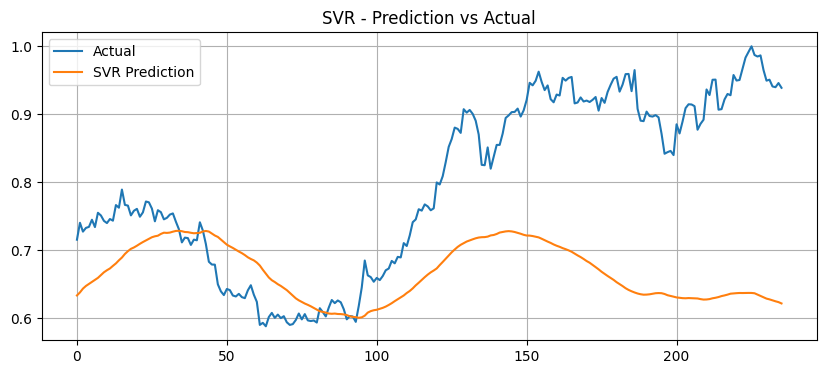

In [263]:
mse = mean_squared_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)
# Initialize results as an empty list before appending
results = []
results.append(['SVR', mse, r2])
print("SVR -> MSE:", mse, "R2:", r2)
plt.figure(figsize=(10, 4))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_svr, label='SVR Prediction')
plt.title('SVR - Prediction vs Actual')
plt.legend()
plt.grid(True)
plt.show()

In [264]:
# 2. KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_flat, y_train)
y_pred_knn = knn.predict(X_test_flat)


KNN -> MSE: 0.012079153891929564 R2: 0.25377566689275677


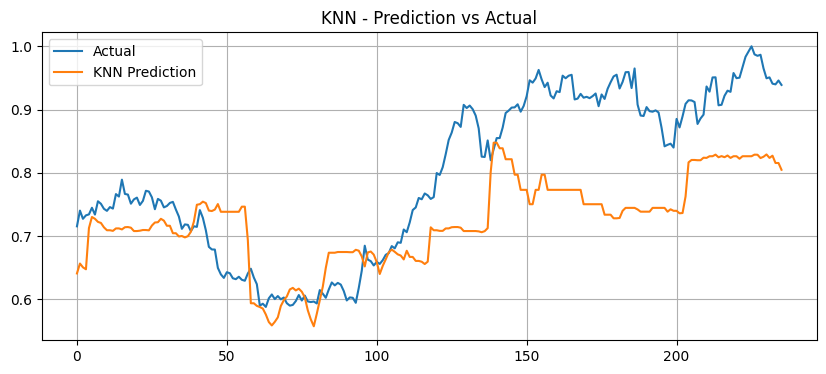

In [275]:
mse = mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)
results.append(['KNN', mse, r2])
print("KNN -> MSE:", mse, "R2:", r2)
plt.figure(figsize=(10, 4))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_knn, label='KNN Prediction')
plt.title('KNN - Prediction vs Actual')
plt.legend()
plt.grid(True)
plt.show()

In [285]:
# 3. Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_flat, y_train)
y_pred_dt = dt.predict(X_test_flat)


Decision Tree -> MSE: 0.007222782902123868 R2: 0.553791896142918


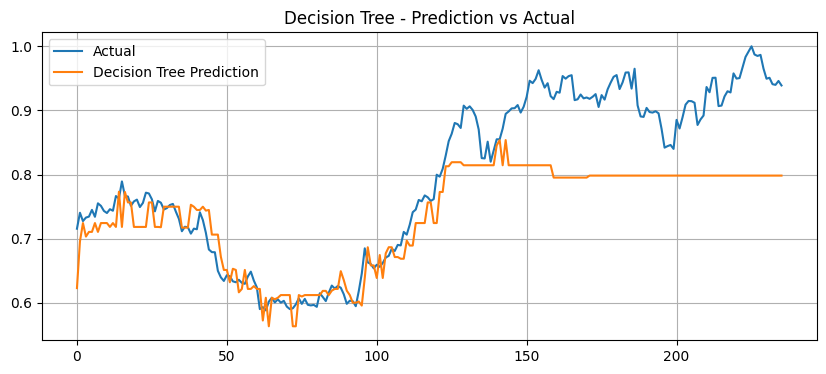

In [286]:
mse = mean_squared_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)
results.append(['Decision Tree', mse, r2])
print("Decision Tree -> MSE:", mse, "R2:", r2)
plt.figure(figsize=(10, 4))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_dt, label='Decision Tree Prediction')
plt.title('Decision Tree - Prediction vs Actual')
plt.legend()
plt.grid(True)
plt.show()

In [287]:
# 4. ElasticNet Regression
en = ElasticNet(alpha=0.1, l1_ratio=0.5)
en.fit(X_train_flat, y_train)
y_pred_en = en.predict(X_test_flat)


ElasticNet -> MSE: 0.08122047644028232 R2: -4.017627592839651


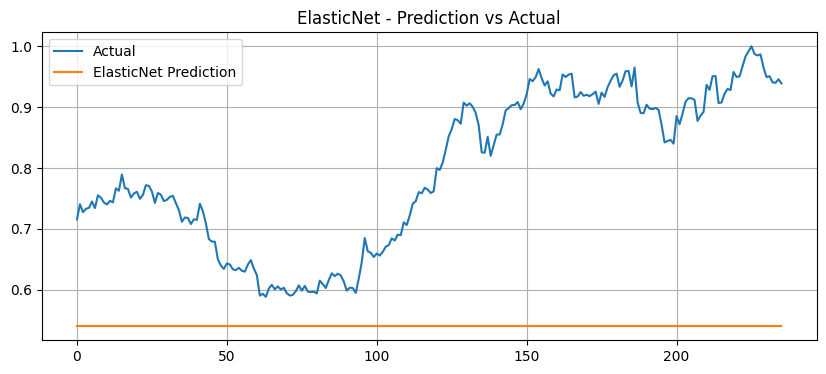

In [288]:
mse = mean_squared_error(y_test, y_pred_en)
r2 = r2_score(y_test, y_pred_en)
results.append(['ElasticNet', mse, r2])
print("ElasticNet -> MSE:", mse, "R2:", r2)
plt.figure(figsize=(10, 4))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_en, label='ElasticNet Prediction')
plt.title('ElasticNet - Prediction vs Actual')
plt.legend()
plt.grid(True)
plt.show()

In [289]:
# 5. Bayesian Ridge Regression
br = BayesianRidge()
br.fit(X_train_flat, y_train)
y_pred_br = br.predict(X_test_flat)

Bayesian Ridge -> MSE: 0.00028026238548185345 R2: 0.982685988309084


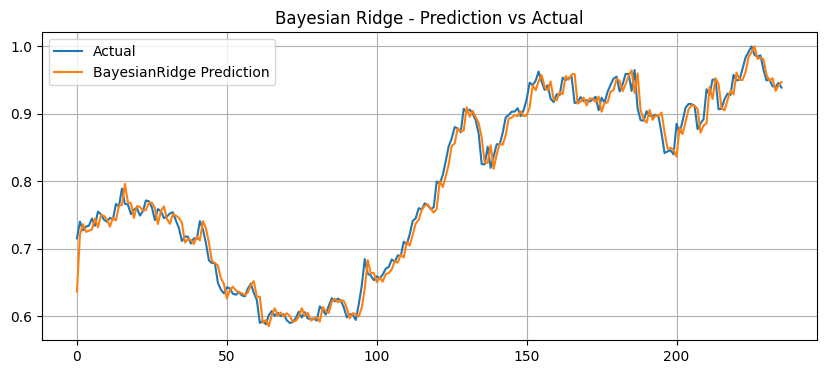

In [291]:
mse = mean_squared_error(y_test, y_pred_br)
r2 = r2_score(y_test, y_pred_br)
results.append(['Bayesian Ridge', mse, r2])
print("Bayesian Ridge -> MSE:", mse, "R2:", r2)
plt.figure(figsize=(10, 4))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_br, label='BayesianRidge Prediction')
plt.title('Bayesian Ridge - Prediction vs Actual')
plt.legend()
plt.grid(True)
plt.show()

In [292]:
# 6. GRU (Gated Recurrent Unit)
gru_model = Sequential()
gru_model.add(GRU(units=50, return_sequences=False, input_shape=(X_train_gru.shape[1], 1)))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')
gru_model.fit(X_train_gru, y_train, epochs=10, batch_size=32, verbose=0)
y_pred_gru = gru_model.predict(X_test_gru).flatten()


C:\Users\pavit\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


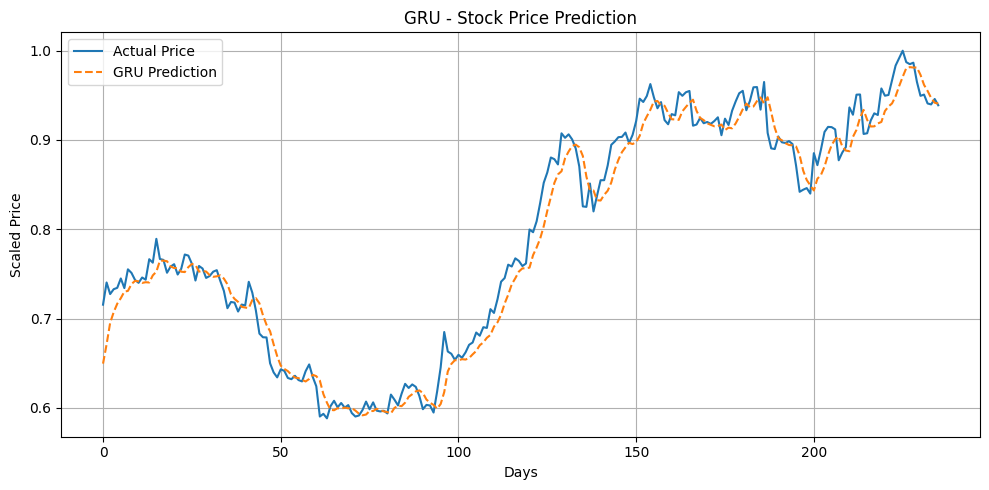

In [293]:
# Plot Example for GRU
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Price')
plt.plot(y_pred_gru, label='GRU Prediction', linestyle='--')
plt.title("GRU - Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Scaled Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Result


In [295]:
# Evaluation
models = ['SVR', 'KNN', 'DecisionTree', 'ElasticNet', 'BayesianRidge', 'GRU']
preds = [y_pred_svr, y_pred_knn, y_pred_dt, y_pred_en, y_pred_br, y_pred_gru]

# Append GRU results to the existing results list
mse_gru = mean_squared_error(y_test, y_pred_gru)
r2_gru = r2_score(y_test, y_pred_gru)
results.append(['GRU', mse_gru, r2_gru])


results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'R2 Score'])
print(results_df)

             Model       MSE  R2 Score
0              SVR  0.032488 -1.007052
1              KNN  0.012079  0.253776
2    Decision Tree  0.007223  0.553792
3       ElasticNet  0.081220 -4.017628
4   Bayesian Ridge  0.000280  0.982686
5              GRU  0.000616  0.961925
6              KNN  0.012079  0.253776
7    Decision Tree  0.007223  0.553792
8       ElasticNet  0.081220 -4.017628
9   Bayesian Ridge  0.000280  0.982686
10             GRU  0.000418  0.974185
11   Decision Tree  0.007223  0.553792
12      ElasticNet  0.081220 -4.017628
13  Bayesian Ridge  0.000280  0.982686
14  Bayesian Ridge  0.000280  0.982686
15             GRU  0.000456  0.971828
16             GRU  0.000456  0.971828
